Problem 1a: Please load one of the imputed hepatitis datasets you created in HW2. You can also use the file in /data/hepatitis_imputed_0.csv if you prefer.

Apply PCA to the feature matrix (exclude the target variable 'Class'), transform the data, print the first two principal component coordinates of the first 5 data points. (4 points)

Please prepare a scatter plot that shows the first two components on the x and y axes of the figure, and the color of the points illustrate the class of the data points. (2 points)

How much varience is retained by the first two components? (2 points)

How many components should we keep to retain at least 99% of the variance? (2 points)

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data/hepatitis_imputed_0.csv')
y = df['Class']
df.drop(columns=['Class'],inplace=True)
X = df.values

print(np.shape(X))
pca = PCA(n_components=np.shape(X)[1]) # n_components is the same as the number of features in X
X_pca = pca.fit_transform(X)
print(X_pca[:5,:2]) # print the first two components of the first five data points

(155, 42)
[[-73.12352385  -8.69313643]
 [-39.01627001  38.67189085]
 [-56.03730274   1.84535739]
 [-46.58642787 -52.76043824]
 [103.75950366 -55.54187772]]


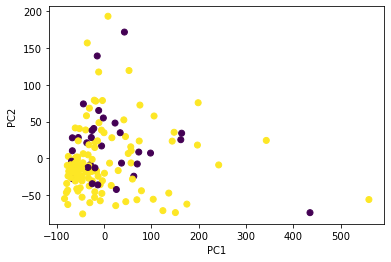

In [2]:
plt.scatter(X_pca[:,0],X_pca[:,1],c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [3]:
print(np.sum(pca.explained_variance_ratio_[:2])) # the explained variance ratio of the first two components

0.9529446017988041


In [4]:
print(sum(np.cumsum(pca.explained_variance_ratio_) < 0.99)+1) # the number of components we need to keep
print(np.cumsum(pca.explained_variance_ratio_)) # this is just to check if the number is correct

4
[0.75818356 0.9529446  0.98696365 0.99946556 0.99958796 0.99965945
 0.99971058 0.99975605 0.99979661 0.99982695 0.99985406 0.99987886
 0.99989992 0.99991899 0.9999348  0.99994882 0.99996255 0.9999737
 0.99998344 0.99999102 0.99999688 0.9999988  0.99999961 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


1b) Open the hepatitis csv file. Please note that the continuous features are not scaled! Scale the continuous features (2 points) and repeat the PCA analysis you just performed in 1a on the preprocessed dataset (0 points).

PCA is one of the ML algorithms for which preprocessing is crucial! PCA will not give you an error message if you apply it to unprocessed data but the results will be weird. Your data needs to be preprocessed and scaled before you apply PCA on it. Please write 1-2 paragraphs describing the differences you observe in the 1a and 1b results and figures and explain why preprocessing changed the results so much. (4 points)

(155, 42)
[[-1.8258188   0.19729835]
 [ 0.06564394 -0.96036384]
 [-0.56164936 -2.42034047]
 [-2.2757841   0.01859807]
 [-1.27538442  0.89690843]]


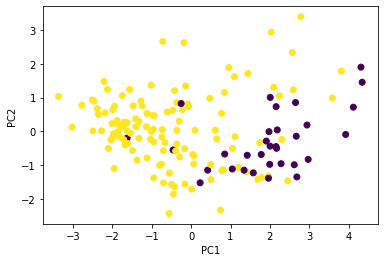

0.3754932506507792
20
[0.27773924 0.37549325 0.45828968 0.53338043 0.59733972 0.65385227
 0.70397323 0.74730212 0.7875052  0.82325549 0.85268797 0.87777313
 0.89892465 0.91778194 0.93378645 0.94864832 0.96199902 0.97311896
 0.98270111 0.99104287 0.99687983 0.99879742 0.99960851 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


In [5]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('data/hepatitis_imputed_0.csv')
y = df['Class']
df.drop(columns=['Class'],inplace=True)

# scale the continuous features
scaler = StandardScaler()
ftrs_scaled = scaler.fit_transform(df[['AGE', 'BILIRUBIN', 'ALK PHOSPHATE','SGOT', 'ALBUMIN', 'PROTIME']])
# update df
df[['AGE', 'BILIRUBIN', 'ALK PHOSPHATE','SGOT', 'ALBUMIN', 'PROTIME']] = ftrs_scaled

X = df.values

# repeat the analysis

print(np.shape(X))
pca = PCA(n_components=np.shape(X)[1]) # n_components is the same as the number of features in X
X_pca = pca.fit_transform(X)
print(X_pca[:5,:2]) # print the first two components of the first five data points


plt.scatter(X_pca[:,0],X_pca[:,1],c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

print(np.sum(pca.explained_variance_ratio_[:2])) # the explained variance ratio of the first two components

print(sum(np.cumsum(pca.explained_variance_ratio_) < 0.99)+1) # the number of components we need to keep
print(np.cumsum(pca.explained_variance_ratio_)) # this is just to check if the number is correct


In 1a, the first two PCs explain 95% of the variance but it is difficult to cleanly separate the classes on the scatter plot. In 1b, the first two PCs explain 37% of the variance, still the yellow and blue points are more separated. 
PCA applied to the unscaled feature matrix in 1a produces PCs that focus on the large variances of the unscaled continuous features. In 1b, all features are on the same scale so the PCs are more meaningful eventhough less of the variance is retained by the first two components.

Problem 2: Please load true_labels_pred_probs.csv into a data frame. It contains the true labels and the predicted probabilities of class 0 and 1 in a classification problem.

Please prepare the predicted classes for a critical probability of 50% and visualize the confusion matrix. (3 points)

Calculate and plot the accuracy, precision, recall, f0.5, f1, f1.5 scores for the critical probability values of 0.05, 0.1, 0.15, ..., 0.9, 0.95. (6 points)

What critical probability maximizes the scores (one critical probability per score)? (3 points)

In [14]:
# this is just copy-paste from the lecture note

import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = np.array(classes)
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Index(['y_true', 'pred_prob_class0', 'pred_prob_class1'], dtype='object')
Confusion matrix, without normalization


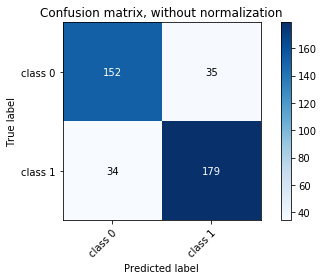

In [15]:
from sklearn.metrics import confusion_matrix

df = pd.read_csv('data/true_labels_pred_probs.csv')
print(df.columns)
y_true = df['y_true'].values
pred_proba = df['pred_prob_class1'].values

y_pred = np.zeros(len(pred_proba),dtype=int)
y_pred[pred_proba < 0.5] = 0
y_pred[pred_proba >= 0.5] = 1

plot_confusion_matrix(y_true,y_pred,classes=['class 0', 'class 1'])
plt.show()


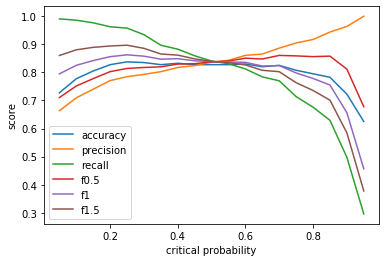

In [16]:
from sklearn.metrics import precision_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

p_crits = np.arange(0.05,1.0,0.05)
acc = np.zeros(len(p_crits))
p = np.zeros(len(p_crits))
r = np.zeros(len(p_crits))
f05 = np.zeros(len(p_crits))
f1 = np.zeros(len(p_crits))
f15 = np.zeros(len(p_crits))

for i in range(len(p_crits)):
    p_crit = p_crits[i]
    y_pred[pred_proba < p_crit] = 0
    y_pred[pred_proba >= p_crit] = 1
    
    acc[i] = accuracy_score(y_true,y_pred)
    p[i] = precision_score(y_true,y_pred)
    r[i] = recall_score(y_true,y_pred)
    f05[i] = fbeta_score(y_true,y_pred,0.5) 
    f1[i] = fbeta_score(y_true,y_pred,1) 
    f15[i] = fbeta_score(y_true,y_pred,1.5) 


plt.plot(p_crits,acc,label='accuracy')
plt.plot(p_crits,p,label='precision')
plt.plot(p_crits,r,label='recall')
plt.plot(p_crits,f05,label='f0.5')
plt.plot(p_crits,f1,label='f1')
plt.plot(p_crits,f15,label='f1.5')
plt.legend()
plt.xlabel('critical probability')
plt.ylabel('score')
plt.show()

In [17]:
print(p_crits[acc == np.max(acc)])
print(p_crits[p == np.max(p)])
print(p_crits[r == np.max(r)])
print(p_crits[f05 == np.max(f05)])
print(p_crits[f1 == np.max(f1)])
print(p_crits[f15 == np.max(f15)])

[0.25]
[0.95]
[0.05]
[0.7]
[0.25]
[0.25]
